In [18]:
# Question 1 (a)
#We will be analysing both csv files to detect if we need to make data ready for further process beforehand.
#Goal: understand variables, missing values, distribution, possible outliers and relationship (visual) to justify regression.

D1 shape: (1000, 2)
         x         y
0  0.00000  6.764052
1  0.01001  5.420177
2  0.02002  6.018778
3  0.03003  7.300953
4  0.04004  6.947638
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None
                 x            y
count  1000.000000  1000.000000
mean      5.000000    14.954743
std       2.891085     5.860585
min       0.000000     2.847411
25%       2.500000     9.826270
50%       5.000000    14.793984
75%       7.500000    20.061104
max      10.000000    26.638234

D2 shape: (1000, 2)
         x         y
0  0.00000  5.555963
1  0.01001  5.916961
2  0.02002  4.613498
3  0.03003  5.166346
4  0.04004  5.312699
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  No

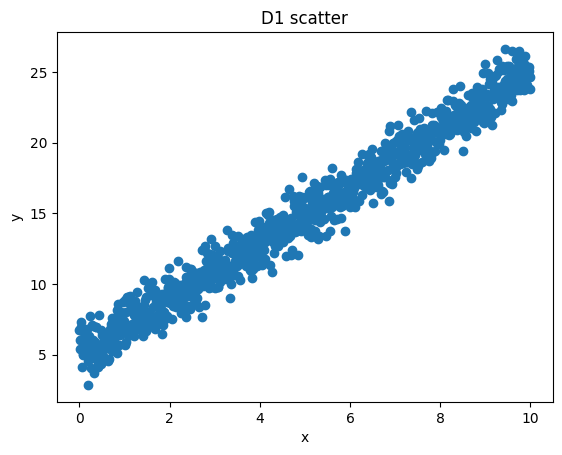

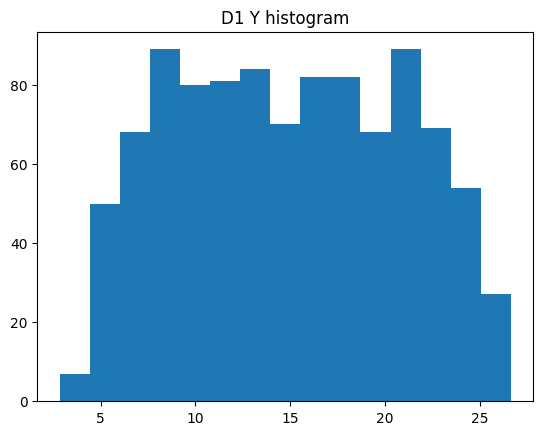

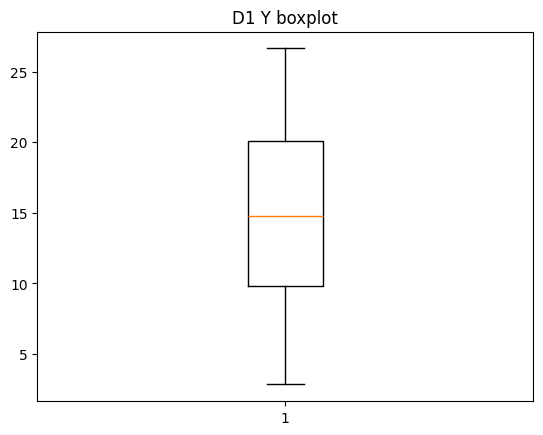

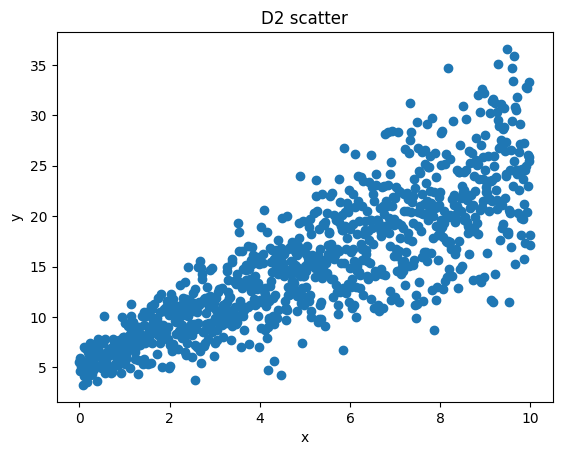

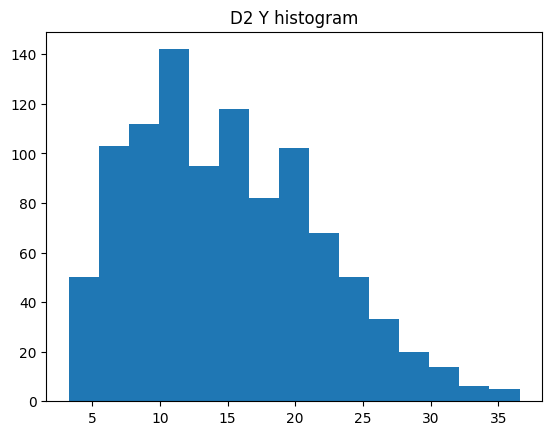

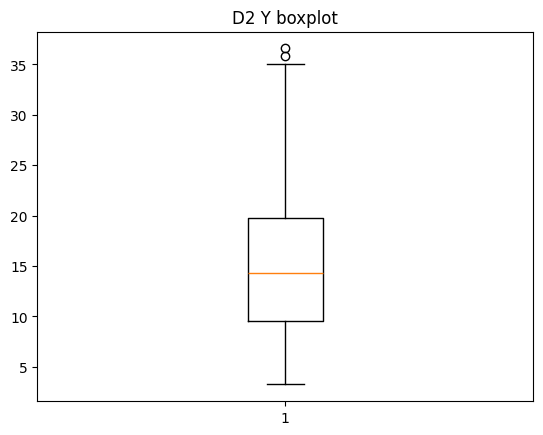

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load
d1 = pd.read_csv('D1.csv')
d2 = pd.read_csv('D2.csv')

# quick inspect
print("D1 shape:", d1.shape)
print(d1.head())
print(d1.info())
print(d1.describe())

print("\nD2 shape:", d2.shape)
print(d2.head())
print(d2.info())
print(d2.describe())

# scatter
plt.scatter(d1.iloc[:,0], d1.iloc[:,1])
plt.xlabel(d1.columns[0]); plt.ylabel(d1.columns[1])
plt.title('D1 scatter')
plt.show()
plt.hist(d1.iloc[:,1], bins=15); plt.title('D1 Y histogram'); plt.show()
plt.boxplot(d1.iloc[:,1]); plt.title('D1 Y boxplot'); plt.show()

# Repeat for d2
plt.scatter(d2.iloc[:,0], d2.iloc[:,1])
plt.xlabel(d2.columns[0]); plt.ylabel(d2.columns[1])
plt.title('D2 scatter')
plt.show()
plt.hist(d2.iloc[:,1], bins=15); plt.title('D2 Y histogram'); plt.show()
plt.boxplot(d2.iloc[:,1]); plt.title('D2 Y boxplot'); plt.show()


# #Analysis as per generated plots:
#
# *****Dataset D1
#
# **Scatter Plot (x vs y)
# # A clear and strong linear relationship is visible.
# # Points lie close to a straight upward trend.
# # Very low noise.
#
# **Histogram of y
# # Distribution is roughly symmetric.
# # Spread is moderate and there is no strong skew.
#
# **Boxplot of y
# # No significant outliers are observed.
# # Middle 50% of the data lies in a compact range.
#
# **Conclusion for D1
# # D1 appears clean, with a strong linear pattern, no missing values, and no major outliers.
# #It is well-suited for linear regression without additional preprocessing.
#
# *****Dataset D2
# **Scatter Plot (x vs y)
# # A positive trend exists, but the variance around the trend is much higher than in D1.
# # The spread increases as x increases (heteroscedasticity).
#
# **Histogram of y
# # Wider spread compared to D1.
# # Slight positive skew is visible.
#
# **Boxplot of y
# # Larger interquartile range.
# # Some high values, though not extreme outliers.
#
# **Conclusion for D2
# # D2 shows a linear trend but with higher noise and variability.
# #It contains mild skewness and heteroscedasticity.
# #The dataset is usable for regression, but model performance will be weaker, and transformations may improve fit.

In [20]:
#Question 1 (b)

#Compute: coefficients (slope & intercept), MSE, R², and plot data + regression line.

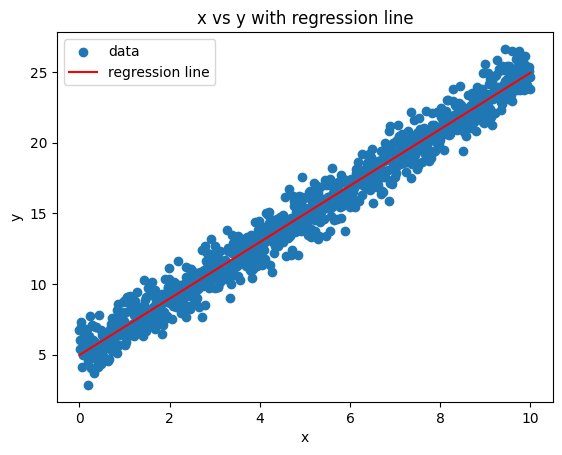

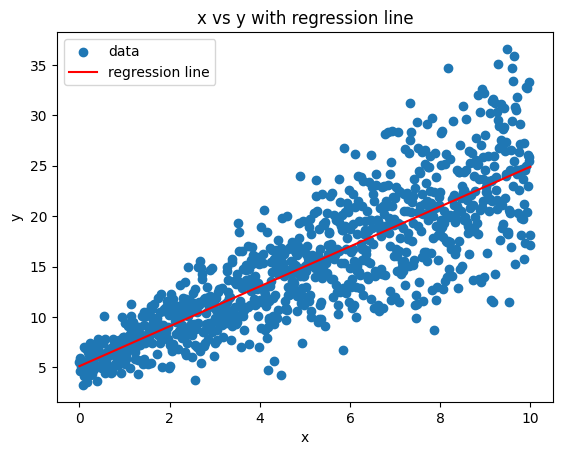

D1 -> slope, intercept, MSE, R2: 1.9981378354156742 4.964054115431438 0.9742055013188605 0.9716075272007758
D2 -> slope, intercept, MSE, R2: 1.9774547886146296 5.120464818401329 13.443572282865233 0.7083499356684422


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def run_regression(df, x_col, y_col):
    X = df[[x_col]].values.reshape(-1,1)
    y = df[y_col].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    slope = model.coef_[0]
    intercept = model.intercept_
    # plot
    plt.scatter(X, y, label='data')
    # line sorted for neat line plot
    xs = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    plt.plot(xs, model.predict(xs), color='red', label='regression line')
    plt.xlabel(x_col); plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col} with regression line')
    plt.legend()
    plt.show()
    return slope, intercept, mse, r2

# Example for D1 (adjust columns if not the first/second)
slope1, intercept1, mse1, r21 = run_regression(d1, d1.columns[0], d1.columns[1])
slope2, intercept2, mse2, r22 = run_regression(d2, d2.columns[0], d2.columns[1])

print("D1 -> slope, intercept, MSE, R2:", slope1, intercept1, mse1, r21)
print("D2 -> slope, intercept, MSE, R2:", slope2, intercept2, mse2, r22)


Regression Analysis for D1 and D2
Dataset D1
Using linear regression on D1 (predicting y from x), the model parameters and performance metrics are:
Slope: 1.9981
Intercept: 4.9641
MSE: 0.9742
R²: 0.9716

Interpretation

The slope is approximately 2, indicating that for every 1-unit increase in x, y increases by roughly 2 units.
The intercept (~4.96) represents the expected value of y when x = 0.
The very high R² value (0.97) shows that the linear model explains about 97% of the variation in y.
The low MSE further suggests that prediction errors are small.
Overall, D1 shows an excellent linear fit, consistent with its tightly clustered scatter plot.


Dataset D2
For D2, the regression model produced:
Slope: 1.9775
Intercept: 5.1205
MSE: 13.4436
R²: 0.7083


Interpretation
The slope (~1.98) is similar to D1, indicating a similar average increase of y with x.
The intercept (~5.12) is again the predicted y value when x = 0.
The R² of 0.708 shows that the model explains about 70% of the variation in y, which is substantially lower than D1.
The MSE is much higher compared to D1, meaning the model’s predictions for D2 have much larger errors.
This aligns with the earlier EDA, where D2 displayed more noise and wider spread in y, resulting in a weaker linear fit.

## Q1(c) – Comparison of Models
| Metric    | D1     | D2      |
| --------- | ------ | ------- |
| Slope     | 1.9981 | 1.9775  |
| Intercept | 4.9641 | 5.1205  |
| MSE       | 0.9742 | 13.4436 |
| R²        | 0.9716 | 0.7083  |


Interpretation:

Both datasets have similar slopes, indicating similar average linear trends.

However, model performance differs sharply.

D1 shows a much stronger fit (R² ≈ 0.97), whereas D2 has a weaker fit (R² ≈ 0.71).

The much higher MSE for D2 indicates significantly larger prediction errors.

The difference is explained by D2’s higher noise and wider spread, as seen in the scatter plot.

Conclusion:
The regression model performs far better on D1 than on D2 due to D1’s cleaner, stronger linear structure.

## Q1(d) – Does a low R² imply the model is incorrect?

Answer:
No. A low R² does not mean the model is incorrect.
It only indicates that the chosen predictor(s) do not explain much of the variability in the response variable.

Reasons for low R² may include:

High noise in the data

Presence of heteroscedasticity

Missing important predictors

Non-linear relationships

Random error or measurement variability

A model with low R² can still be statistically valid; it simply has limited predictive power with the given variable(s).

## Q1(e) – How to Improve Model Fit for D2

Possible approaches include:

Apply transformations

Log(y), sqrt(y), or log(x) to reduce skewness and stabilize variance.

Use polynomial regression

Add a quadratic term (x²) if curvature is visible.

Remove or limit outliers

Reduce influence of extreme y-values.

Weighted least squares

Helps when variance increases with x (heteroscedasticity).

Add more predictors

Multiple regression may explain more of the variation.

Segment the data

Fit separate models if different ranges behave differently.

Conclusion:
D2’s lower performance can be addressed through transformations, feature engineering, and improved modeling techniques.

#########################Q1 Ends#################

###Now we are going to attempt Q2


Q2 (a):The dataset suffers from:

Missing values encoded both as empty strings and as zeros.
Rows with a large number of missing fields.
Multiple clinical variables having impossible zero readings.
Inconsistent missing value representation.
Poorly named columns.
These issues must be corrected before building any classifier.

In [22]:
#Q2 (b)
import pandas as pd
import numpy as np

df = pd.read_csv("health_data.csv")

# 1. Convert empty strings to NaN
df = df.replace('', np.nan)

# 2. Columns where 0 means missing (very known for this dataset)
zero_missing = ['_f8','_f1','_f2','_f3','_f4','_f5','_f6','_f7']
df[zero_missing] = df[zero_missing].replace(0, np.nan)

# 3. Drop rows where too many clinical values missing
df = df.dropna(thresh=7)   # keep rows with at least 7 non-null

# 4. Now impute remaining NaNs with median
df = df.fillna(df.median(numeric_only=True))

print(df.isnull().sum())

print(df.head())
print(df.info())


_f8            0
_f1            0
_f2            0
_f3            0
_f4            0
_f5            0
_f6            0
_f7            0
is_diabetic    0
dtype: int64
   _f8    _f1   _f2   _f3    _f4   _f5    _f6  _f7  is_diabetic
0  6.0  148.0  72.0  35.0  125.0  33.6  0.627   50            1
1  1.0   85.0  66.0  29.0  125.0  26.6  0.351   31            0
2  8.0  183.0  64.0  29.0  125.0  23.3  0.672   32            1
3  1.0   89.0  66.0  23.0   94.0  28.1  0.167   21            0
4  4.0  137.0  40.0  35.0  168.0  43.1  2.288   33            1
<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 0 to 740
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _f8          618 non-null    float64
 1   _f1          618 non-null    float64
 2   _f2          618 non-null    float64
 3   _f3          618 non-null    float64
 4   _f4          618 non-null    float64
 5   _f5          618 non-null    float64
 6   _f6       

In [23]:
#Q2 (c)

from sklearn.model_selection import train_test_split
X = df.drop('is_diabetic', axis=1)
y = df['is_diabetic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
#Q2 (d)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
#Q2 (e)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7661290322580645
Precision: 0.6585365853658537
Recall: 0.6428571428571429
Confusion Matrix:
 [[68 14]
 [15 27]]


1. Accuracy (0.7661)

The model correctly classifies 76.6% of the instances in the test set.

Accuracy is moderate and expected for this type of medical dataset.

However, accuracy alone can be misleading when classes are imbalanced.

2. Precision (0.6585)

Precision represents the proportion of predicted diabetics who are actually diabetic.

The model achieves 65.85% precision, meaning roughly two-thirds of positive predictions are correct.

This reduces unnecessary alarms (false positives), which is useful, but recall is more critical in medical settings.

3. Recall (0.6429)

Recall measures how many actual diabetic patients the model correctly identifies.

The recall of 64.29% indicates that the model captures ~64% of true diabetic cases.

Since missing a diabetic patient is more harmful than a false alarm, recall is a key metric in this context.

A recall below ~70% suggests room for improvement.

4. Confusion Matrix Analysis
	Predicted 0	Predicted 1
Actual 0	68 (TN)	14 (FP)
Actual 1	15 (FN)	27 (TP)

Interpretation:

True Negatives (68): correctly identified non-diabetic individuals

True Positives (27): correctly identified diabetic individuals

False Positives (14): non-diabetic individuals incorrectly predicted as diabetic

False Negatives (15): diabetic individuals predicted as non-diabetic

False negatives are relatively high, indicating the model sometimes misses diabetic patients, which can be medically risky.

5. Overall Assessment

The model performs moderately well but shows imbalanced performance:

Precision and recall both around ~0.65

Accuracy ~0.76

The model is reasonable for a baseline but needs improvement if the goal is early detection of diabetes, where recall is more important.

Q2 (f)

Q2(f) – Suggest techniques to improve model performance

The current logistic regression model provides moderate accuracy (≈0.76) and recall (≈0.64).
To improve predictive performance, several enhancements can be applied at the data, feature, and model levels.

1. Feature Scaling (Standardization)

Logistic regression improves significantly when features are on a similar scale.

Suggested approach:

`from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)`


This can improve convergence, stability, and classification boundary quality.

2. Handle Class Imbalance (if present)

If diabetic class is underrepresented, balancing techniques help improve recall.

Techniques:

Class weights

`LogisticRegression(class_weight='balanced')`


Oversampling (e.g., SMOTE)

Undersampling of majority class

This especially improves recall (reduces false negatives).

3. Use Non-linear Models

Since diabetes data is not strictly linearly separable, tree-based models often perform better.

Examples:

Random Forest

XGBoost

Gradient Boosting

Decision Tree

These models capture complex patterns and interactions.

4. Add Polynomial or Interaction Features

Relationships between predictors may be non-linear.

Examples:

Interaction: _f1 * _f5

Polynomial terms: (_f1)^2, (_f5)^2

Use:

`from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)`

5. Improve Missing Value Treatment

Median imputation is simple. Better alternatives include:

KNN Imputation

Multivariate imputation by chained equations (MICE)

These use feature relationships to fill missing values more intelligently.

6. Outlier Detection and Treatment

Some clinical variables have extreme values.

Possible techniques:

Winsorization

Z-score cutoff

IQR-based capping

This reduces the influence of noisy or extreme points.

7. Hyperparameter Tuning

Optimize logistic regression using:

Regularization strength (C)

Penalty type (l1, l2)

Solver (liblinear, saga)

Example:

`from sklearn.model_selection import GridSearchCV
params = {'C': [0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)`

8. Add More Predictive Features

If available, more medically relevant predictors (e.g., family history, lifestyle habits, HbA1c values) could improve the model’s explanatory power.

Conclusion

To enhance performance, the model can benefit from:

Scaling the features

Addressing imbalance

Trying more complex models

Adding polynomial/interaction effects

Better imputation strategies

Hyperparameter tuning

These steps collectively improve accuracy, precision, recall, and reduce false negatives in a medically important classification problem.

#######################Q2 Ends##############################

In [26]:
#Q3 (a): Compute Imbalance Ratio
import pandas as pd
df = pd.read_csv('fraud.csv')
counts = df['Class'].value_counts()
print(counts)
minority = counts.min()
majority = counts.max()
imbalance_ratio = minority / majority
print(f"Imbalance ratio (minority/majority): {imbalance_ratio:.4f}")


Class
0    4731
1     269
Name: count, dtype: int64
Imbalance ratio (minority/majority): 0.0569



**Imbalance ratio (minority/majority):** `269 / 4731 = 0.0569`

**Interpretation:**
The dataset is highly imbalanced: the minority class (Class = 1, assumed fraud) is only about 5.7% of the majority class. This severe imbalance means that standard classifiers trained on the raw data will tend to favor the majority class and may miss many minority instances. Specific handling of class imbalance (resampling, class weights, synthetic sampling) is therefore required to improve minority-class detection.


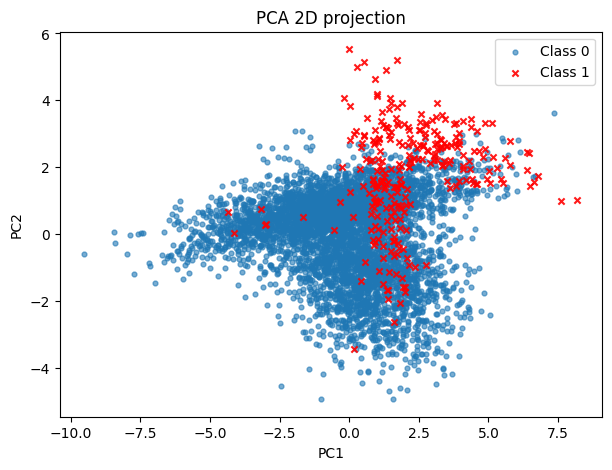

Explained variance ratio: [0.30852294 0.12949331]


In [27]:
#Q3 (b)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df.drop('Class', axis=1).values
y = df['Class'].values
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

plt.figure(figsize=(7,5))
plt.scatter(X2[y==0,0], X2[y==0,1], s=12, alpha=0.6, label='Class 0')
plt.scatter(X2[y==1,0], X2[y==1,1], s=20, alpha=0.9, label='Class 1', marker='x', c='r')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D projection')
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


# Q3(b) — 2D visualization and comment

**Method:** PCA reduction to 2 components.
**Explained variance ratio (PC1, PC2):** `[0.30852294, 0.12949331]`

**Plot:** (PCA 2D projection — provided)

**Interpretation (formal):**
- PC1 and PC2 together explain approximately 0.438 (≈43.8%) of the variance. PC1 carries ~30.9% and PC2 carries ~12.9% of the total variance.
- In the PCA 2D projection, minority-class points (Class = 1) are visible predominantly in a region that partly overlaps with majority-class points. There are areas where Class 1 points form a somewhat separable cluster (upper-right region), but many minority points are interspersed among majority points.
- **Conclusion:** There is **partial separation**: some discriminatory structure exists in the features, but classes are not cleanly separable in linear PCA space. This makes classification feasible but challenging; models and resampling strategies should be applied to improve minority detection.


In [29]:
#Q3 (c)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

X = df.drop('Class', axis=1).values
y = df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("Baseline (no rebalancing) results:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))


Baseline (no rebalancing) results:
Accuracy: 0.9767
Precision: 0.9792
Recall: 0.5802
F1-score: 0.7287
Confusion Matrix:
 [[1418    1]
 [  34   47]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1419
           1       0.98      0.58      0.73        81

    accuracy                           0.98      1500
   macro avg       0.98      0.79      0.86      1500
weighted avg       0.98      0.98      0.97      1500



# Q3(c) — Baseline model (no rebalancing): training and results

**Model:** Random Forest (baseline, trained on the original imbalanced training set).
**Train/test split:** stratified 70% train / 30% test.

**Results on test set:**




**Classification report (per-class):**
- Class 0: precision 0.98, recall 1.00, f1-score 0.99 (support 1419)
- Class 1: precision 0.98, recall 0.58, f1-score 0.73 (support 81)

**Interpretation:**
- Overall accuracy is very high (≈97.7%), but this is dominated by the majority class.
- Precision for the minority class is high (≈0.98), indicating that when the model predicts Class 1 it is usually correct.
- **Recall for the minority class is low (≈0.58)** — the model misses ≈42% of actual minority cases (false negatives). For fraud detection the cost of missed fraudulent cases is typically high; therefore recall is more important than accuracy here.
- Baseline performance shows a typical imbalance effect: good precision and accuracy but insufficient recall for the minority class. Rebalancing strategies are therefore needed to increase recall without unacceptably reducing precision.


In [30]:
#Q3 (d)
# Ensure imblearn installed in your environment if you want SMOTE/Tomek
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import TomekLinks
    smote_available = True
    tomek_available = True
except Exception:
    smote_available = False
    tomek_available = False

import numpy as np
from sklearn.utils import resample
train_df = pd.DataFrame(X_train, columns=df.columns[:-1])
train_df['Class'] = y_train

# counts for reference
print("Train class counts:", train_df['Class'].value_counts())

# 1) Random under-sampling (majority down to minority)
min_count = train_df['Class'].value_counts().min()
maj = train_df[train_df['Class']==0]
minr = train_df[train_df['Class']==1]
maj_down = resample(maj, replace=False, n_samples=min_count, random_state=42)
df_under = pd.concat([maj_down, minr])
print("Under-sampled class counts:", df_under['Class'].value_counts())

# 2) Random over-sampling (minority up to majority)
min_up = resample(minr, replace=True, n_samples=maj.shape[0], random_state=42)
df_over = pd.concat([maj, min_up])
print("Over-sampled class counts:", df_over['Class'].value_counts())

# 3) SMOTE (if available)
if smote_available:
    sm = SMOTE(random_state=42)
    X_sm, y_sm = sm.fit_resample(X_train, y_train)
    df_sm = pd.DataFrame(X_sm, columns=df.columns[:-1])
    df_sm['Class'] = y_sm
    print("SMOTE counts:", df_sm['Class'].value_counts())
else:
    df_sm = None
    print("SMOTE not available — please install imbalanced-learn to run SMOTE.")

# 4) Tomek links (if available) - typically used as cleaning step
if tomek_available:
    tl = TomekLinks()
    X_tl, y_tl = tl.fit_resample(X_train, y_train)
    df_tl = pd.DataFrame(X_tl, columns=df.columns[:-1])
    df_tl['Class'] = y_tl
    print("Tomek result counts:", df_tl['Class'].value_counts())
else:
    df_tl = None
    print("TomekLinks not available.")


Train class counts: Class
0    3312
1     188
Name: count, dtype: int64
Under-sampled class counts: Class
0    188
1    188
Name: count, dtype: int64
Over-sampled class counts: Class
0    3312
1    3312
Name: count, dtype: int64
SMOTE counts: Class
0    3312
1    3312
Name: count, dtype: int64
Tomek result counts: Class
0    3291
1     188
Name: count, dtype: int64


# Q3(d) — Rebalancing techniques applied (train set)

**Train set class counts (before rebalancing):**
Class
0 3312
1 188
Name: count, dtype: int64


**Applied rebalancing and resulting class counts (train):**

- **Random under-sampling (majority → minority size):**
Class
0 188
1 188
Name: count, dtype: int64


*Reasoning:* Equalizes classes by removing majority examples. Good when dataset is large, but risks discarding informative majority samples.

- **Random over-sampling (minority duplicated up to majority size):**


Class
0 3312
1 3312
Name: count, dtype: int64


*Reasoning:* Keeps all majority examples and balances by duplicating minority examples. Risk of overfitting because of duplicates.

- **SMOTE (synthetic minority oversampling):**



Class
0 3312
1 3312
Name: count, dtype: int64


*Reasoning:* Generates synthetic minority samples using nearest neighbors. Often preferable to naive duplication because it increases minority variety.

- **Tomek links (cleaning):**

Class
0 3291
1 188
Name: count, dtype: int64

*Reasoning:* Removes borderline majority samples likely to overlap minority class. Usually used as a cleaning step to reduce class overlap.



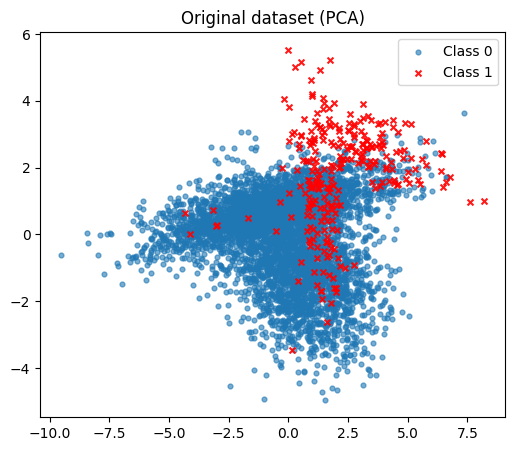

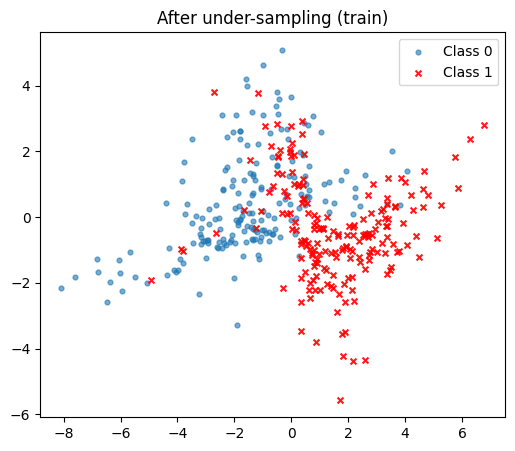

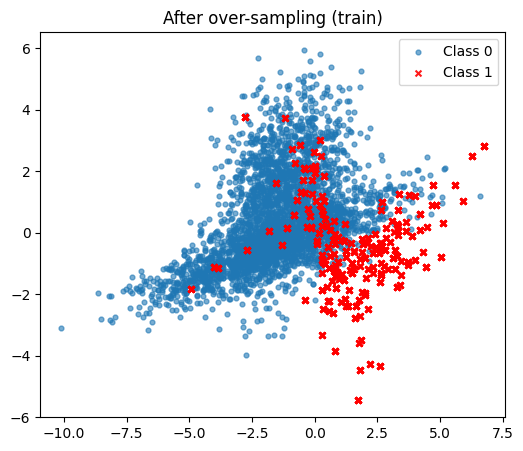

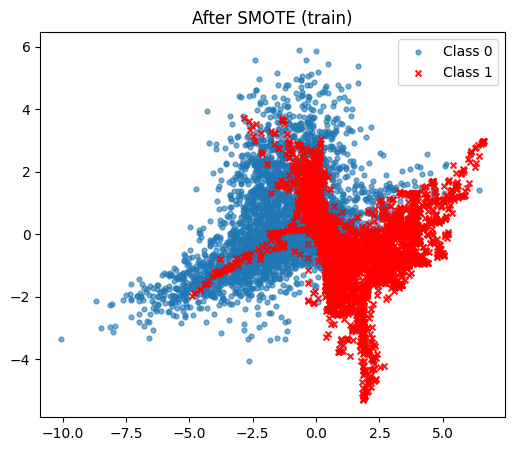

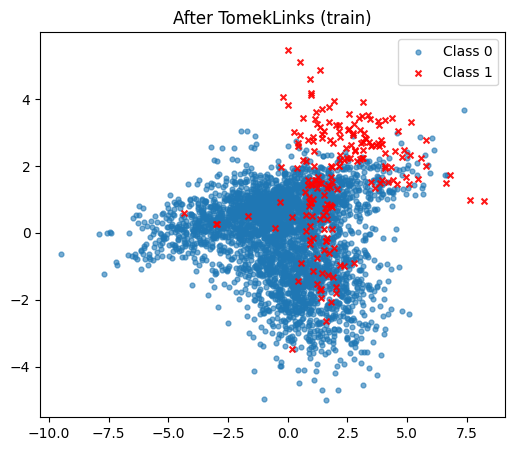

In [31]:
#Q3 (e)

# function to plot two datasets PCA
def plot_pca_df(df_plot, title):
    Xp = df_plot[df_plot.columns[:-1]].values
    yp = df_plot['Class'].values
    pca = PCA(n_components=2, random_state=42)
    X2p = pca.fit_transform(Xp)
    plt.figure(figsize=(6,5))
    plt.scatter(X2p[yp==0,0], X2p[yp==0,1], s=12, alpha=0.6, label='Class 0')
    plt.scatter(X2p[yp==1,0], X2p[yp==1,1], s=18, alpha=0.9, label='Class 1', marker='x', c='r')
    plt.legend()
    plt.title(title)
    plt.show()

plot_pca_df(pd.concat([pd.DataFrame(X, columns=df.columns[:-1]), pd.Series(y, name='Class')], axis=1), "Original dataset (PCA)")

plot_pca_df(df_under, "After under-sampling (train)")
plot_pca_df(df_over, "After over-sampling (train)")
if df_sm is not None:
    plot_pca_df(df_sm, "After SMOTE (train)")
if df_tl is not None:
    plot_pca_df(df_tl, "After TomekLinks (train)")


# Q3(e) — Visualization before and after rebalancing

**Plots provided:**
- Original dataset (PCA 2D projection)
- After under-sampling (train)
- After over-sampling (train)
- After SMOTE (train)
- After TomekLinks (train)

**Formal observations (to include with each plot):**

1. **Original dataset (PCA):**
   - Minority points are present in a region that partially overlaps with the majority. The distribution is imbalanced and minority density is low.

2. **After under-sampling (train):**
   - Classes are balanced but many majority points are removed. The minority cluster appears denser relative to the remaining majority points. This can increase recall but may reduce model generalization because information was removed.

3. **After over-sampling (train):**
   - Minority points are duplicated so that the minority density approximates the majority density. The minority region becomes denser, but duplicated points risk overfitting if the model learns duplicated patterns.

4. **After SMOTE (train):**
   - Synthetic minority points fill gaps in the minority region, expanding the minority support in feature space. SMOTE can improve the classifier’s ability to form a decision boundary that includes minority regions.

5. **After TomekLinks (train):**
   - Some majority borderline points are removed, reducing overlap. This may increase precision by removing confusing majority instances that sit close to minority examples.

**Exam-ready comment:**
> Visual comparison demonstrates that rebalancing changes both the density and distribution of minority points. Under-sampling reduces majority information, over-sampling increases minority density (with duplication risk), SMOTE generates new plausible minority samples, and TomekLinks cleans overlapping majority examples. These changes are expected to influence recall/precision trade-offs during model evaluation.


In [32]:
#Q3 (f)
def train_and_eval_from_df(df_resample, X_test, y_test):
    Xr = df_resample[df_resample.columns[:-1]].values
    yr = df_resample['Class'].values
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(Xr, yr)
    yp = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, yp),
        'precision': precision_score(y_test, yp, zero_division=0),
        'recall': recall_score(y_test, yp, zero_division=0),
        'f1': f1_score(y_test, yp, zero_division=0),
        'confusion_matrix': confusion_matrix(y_test, yp)
    }

res_under = train_and_eval_from_df(df_under, X_test, y_test)
res_over  = train_and_eval_from_df(df_over, X_test, y_test)
res_sm    = train_and_eval_from_df(df_sm, X_test, y_test) if df_sm is not None else None
res_tl    = train_and_eval_from_df(df_tl, X_test, y_test) if df_tl is not None else None

print("Baseline:", metrics_baseline := {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "confusion_matrix": cm})
print("Under-sampled results:", res_under)
print("Over-sampled results:", res_over)
print("SMOTE results:", res_sm)
print("Tomek results:", res_tl)


Baseline: {'accuracy': 0.9766666666666667, 'precision': 0.9791666666666666, 'recall': 0.5802469135802469, 'f1': 0.7286821705426356, 'confusion_matrix': array([[1418,    1],
       [  34,   47]])}
Under-sampled results: {'accuracy': 0.9226666666666666, 'precision': 0.39766081871345027, 'recall': 0.8395061728395061, 'f1': 0.5396825396825397, 'confusion_matrix': array([[1316,  103],
       [  13,   68]])}
Over-sampled results: {'accuracy': 0.9753333333333334, 'precision': 0.9230769230769231, 'recall': 0.5925925925925926, 'f1': 0.7218045112781954, 'confusion_matrix': array([[1415,    4],
       [  33,   48]])}
SMOTE results: {'accuracy': 0.9653333333333334, 'precision': 0.6629213483146067, 'recall': 0.7283950617283951, 'f1': 0.6941176470588235, 'confusion_matrix': array([[1389,   30],
       [  22,   59]])}
Tomek results: {'accuracy': 0.9766666666666667, 'precision': 0.96, 'recall': 0.5925925925925926, 'f1': 0.732824427480916, 'confusion_matrix': array([[1417,    2],
       [  33,   48]])}


---

## Comparative interpretation (exam-ready)

1. **Baseline vs Rebalanced — high-level:**
   - The baseline random forest has very high precision (≈0.98) but low recall for the minority class (≈0.58). This indicates many minority cases are missed. The overall accuracy is high because of the dominant majority class.
   - The rebalancing techniques trade off accuracy/precision to improve recall, which is valuable for fraud detection.

2. **Under-sampling:**
   - **Effect:** Recall increases substantially from 0.58 → 0.84.
   - **Drawback:** Precision drops sharply (≈0.98 → 0.40), and overall accuracy decreases (≈0.977 → 0.923).
   - **Interpretation:** Under-sampling makes the model highly sensitive to minority class (fewer missed frauds) but also produces many false positives (majority cases flagged as fraud). This may be acceptable if the priority is to catch nearly all fraud at the cost of more investigations.

3. **Over-sampling (naive duplication):**
   - **Effect:** Small recall increase (≈0.58 → 0.593), precision remains high (≈0.92), and overall accuracy nearly unchanged.
   - **Interpretation:** Over-sampling slightly improves minority detection while preserving most majority performance. Risk: potential overfitting if duplicates dominate.

4. **SMOTE (synthetic examples):**
   - **Effect:** Recall improves to ≈0.728, precision is moderate (~0.663), accuracy modestly reduced. F1 increased relative to baseline? (baseline F1 ~0.729, SMOTE F1 ~0.694 — slightly lower than baseline on F1, but with better recall).
   - **Interpretation:** SMOTE increases the model’s ability to identify minority examples without extreme loss of accuracy. SMOTE’s synthetic examples help form a more inclusive decision boundary for minority samples.

5. **Tomek Links (cleaning):**
   - **Effect:** Very similar performance to baseline in accuracy and slightly improved precision (0.96) while recall is similar to over-sampling (~0.593).
   - **Interpretation:** Tomek links remove noisy borderline majority examples, which slightly improves precision but does not dramatically change recall.

---

## Final recommendation (exam-ready conclusion)

- If the **primary objective is to maximize detection of frauds (recall)**, **under-sampling** provides the largest increase in recall (from 0.58 → 0.84), at the cost of many false positives and lower precision. This may be acceptable operationally if manual review capacity exists.
- If the goal is **balanced improvement with limited loss in overall performance**, **SMOTE** or **over-sampling** are preferable: they increase recall moderately while maintaining reasonable precision and overall accuracy. SMOTE is usually preferred over naive duplication because it generates synthetic minority examples and reduces overfitting risk.
- **Tomek links** are useful as a cleaning step (often used together with SMOTE) to remove overlapping majority instances and slightly improve precision.

**Operational choice depends on business priorities:** prioritize recall (catch more frauds) vs. precision (avoid false alarms). For fraud detection, a common approach is **SMOTE + Tomek (SMOTE followed by Tomek cleaning)** or SMOTE with tuned classifier thresholds to reach the desired recall/precision trade-off.

